# Credit Card Fraud Detection Models Training

**Models**
* Logistic Regression
* Decision Tree
* Random Forest

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import os, sys
import warnings
warnings.filterwarnings('ignore')

# Get working directory
sys.path.append(os.path.abspath('..'))

# import model training scripts
from scripts.ml_model_training import *

In [2]:
# load credit card data
filepath = '../data/creditcard.csv'
df = load_data(filepath)

# get feature and target variable
X, y = df.drop(columns=['Class']), df['Class']

# get train and test set
X_train, X_test, y_train, y_test = get_train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

## Training on Logistic Regression Model

In [3]:
# Call the model
lr_model = LogisticRegressionModel()

# Fit into train dataset
lr_model.fit(X_train, y_train)

# Make a prediction
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
lr_metrics = lr_model.evaluate(y_test, y_pred_lr)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Logistic Regression Evaluation
Accuracy: 0.9991
Precision: 0.8636
Recall: 0.5816
F1: 0.6951
Roc_auc: 0.7907
Confusion Matrix:
[[56855     9]
 [   41    57]]


## Training on Decesion Tree Model

In [4]:
# Call the model
dt_model  = DecisionTreeModel()

# Fit into train dataset
dt_model.fit(X_train, y_train)

# Make a Prediction
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
dt_metrics = dt_model.evaluate(y_test, y_pred_dt)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Dicision Tree Model Evaluation
Accuracy: 0.9994
Precision: 0.9437
Recall: 0.6837
F1: 0.7929
Roc_auc: 0.8418
Confusion Matrix:
[[56860     4]
 [   31    67]]


## Training on Random Forest Model

In [5]:
# Call the model
rf_model = RandomForestModel()

# Fit into train Dataset
rf_model.fit(X_train, y_train)

# Make a prediction
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_metrics = rf_model.evaluate(y_test, y_pred_rf)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Dicision Tree Model Evaluation
Accuracy: 0.9996
Precision: 0.9625
Recall: 0.7857
F1: 0.8652
Roc_auc: 0.8928
Confusion Matrix:
[[56861     3]
 [   21    77]]


## Model Comparison


Model Comparison Metrics
                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.999122   0.863636  0.581633  0.695122  0.790737
Decision Tree        0.999386   0.943662  0.683673  0.792899  0.841802
Random Forest        0.999579   0.962500  0.785714  0.865169  0.892831


<Figure size 1200x800 with 0 Axes>

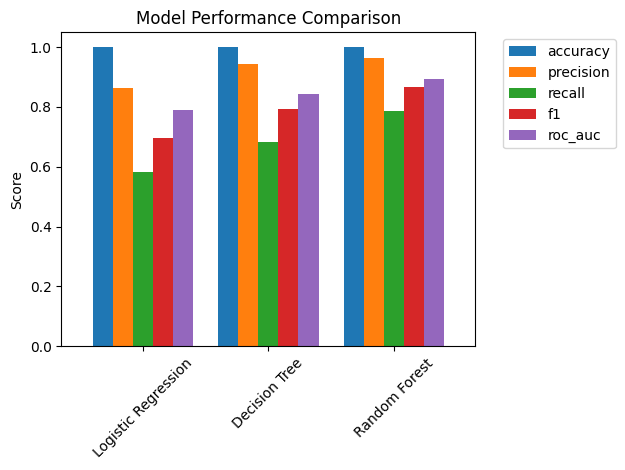

In [6]:
model_metrics = {
    'Logistic Regression': lr_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics
    }
model_comparison = compare_model(model_metrics)

#### Conclusion 
From the comparison, Random Forest outperforms both Logistic Regression and Decision Tree across all key metrics. While all models achieve very high accuracy (~99.9%), Random Forest excels in recall (78.57%), F1-score (86.52%), and ROC-AUC (89.28%), indicating better overall predictive power and generalization.

Decision Tree follows closely behind with a solid balance between precision (94.37%) and recall (68.37%), making it a viable option if model interpretability is a priority. Logistic Regression, while still performing well, has the lowest recall (58.16%) and F1-score (69.51%), making it less effective for cases where capturing the positive class is critical.

#### Model Selection:
Random Forest is the best choice due to its superior recall, F1-score, and ROC-AUC, ensuring better classification performance and robustness. It is ideal for tasks requiring high predictive accuracy and generalization.